In [1]:
#-*- coding:utf-8 -*-
# @File    : Predict_PM2dot5.py
# @Date    : 2019-05-19
# @Author  : 追风者
# @Software: PyCharm
# @Python Version: python 3.6
# --------------------- 
# 作者：Hirotransfer 
# 来源：CSDN 
# 原文：https://blog.csdn.net/Crafts_Neo/article/details/90356621 
# 版权声明：本文为博主原创文章，转载请附上博文链接！
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 数据读取与预处理
train_data = pd.read_csv("../data/train.csv")
train_data.drop(['Date', 'stations'], axis=1, inplace=True)
train_data.head()

,observation,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,AMB_TEMP,14,14,14,13,12,12,12,12,15,...,22,22,21,19,17,16,15,15,15,15
1,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,0.26,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,6.6,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [3]:
column = train_data['observation'].unique()
len(column)

18

In [4]:
len(train_data)

4320

#### 将所有数据按column重排，每列就是一个column的所有数据

先得到column='CO'的所有数据

In [5]:
new_train_data = pd.DataFrame(np.zeros([24*240, len(column)]), columns=column) # 4320/18=240

In [6]:
train_data1 = train_data[train_data['observation'] == 'CO']

In [7]:
train_data1.head()

,observation,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
2,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
20,CO,0.26,0.25,0.28,0.27,0.24,0.26,0.34,0.56,0.79,...,0.34,0.35,0.38,0.61,0.44,0.4,0.4,0.55,0.41,0.33
38,CO,0.32,0.35,0.37,0.31,0.29,0.27,0.3,0.51,0.89,...,0.31,0.34,0.42,0.53,0.55,0.6,0.49,0.28,0.35,0.37
56,CO,0.35,0.35,0.32,0.33,0.32,0.33,0.35,0.41,0.43,...,0.48,0.53,0.59,0.7,0.66,0.79,0.64,0.66,0.68,0.65
74,CO,0.59,0.56,0.54,0.54,0.54,0.54,0.54,0.52,0.6,...,0.47,0.47,0.47,0.59,0.5,0.48,0.5,0.51,0.44,0.41


In [8]:
train_data1 = train_data1.drop(['observation'], axis=1)

In [9]:
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,0.74,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
20,0.26,0.25,0.28,0.27,0.24,0.26,0.34,0.56,0.79,1.05,...,0.34,0.35,0.38,0.61,0.44,0.4,0.4,0.55,0.41,0.33
38,0.32,0.35,0.37,0.31,0.29,0.27,0.3,0.51,0.89,0.81,...,0.31,0.34,0.42,0.53,0.55,0.6,0.49,0.28,0.35,0.37
56,0.35,0.35,0.32,0.33,0.32,0.33,0.35,0.41,0.43,0.43,...,0.48,0.53,0.59,0.7,0.66,0.79,0.64,0.66,0.68,0.65
74,0.59,0.56,0.54,0.54,0.54,0.54,0.54,0.52,0.6,0.54,...,0.47,0.47,0.47,0.59,0.5,0.48,0.5,0.51,0.44,0.41


In [10]:
train_data1 = np.array(train_data1)
train_data1

array([['0.51', '0.41', '0.39', ..., '0.35', '0.36', '0.32'],
       ['0.26', '0.25', '0.28', ..., '0.55', '0.41', '0.33'],
       ['0.32', '0.35', '0.37', ..., '0.28', '0.35', '0.37'],
       ...,
       ['0.22', '0.23', '0.21', ..., '0.46', '0.41', '0.35'],
       ['0.35', '0.35', '0.37', ..., '0.26', '0.2', '0.19'],
       ['0.21', '0.2', '0.17', ..., '0.51', '0.57', '0.56']], dtype=object)

In [11]:
train_data1 = train_data1.astype('float')
train_data1 = train_data1.reshape(5760,)
train_data1

array([0.51, 0.41, 0.39, ..., 0.51, 0.57, 0.56])

将所有数据重排

In [12]:
for i in column:
    train_data1 = train_data[train_data['observation'] == i]
    # Be careful with the inplace, as it destroys any data that is dropped!
    train_data1 = train_data1.drop(['observation'], axis=1)
    train_data1 = np.array(train_data1)
    train_data1[train_data1 == 'NR'] = '0'
    train_data1 = train_data1.astype('float')
    train_data1 = train_data1.reshape(5760,) # 24*240=5760
    train_data1 = train_data1.T
    new_train_data[i] = train_data1

## 相关分析

In [13]:
corr = new_train_data.corr()
corr

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
AMB_TEMP,1.000000,-0.409298,-0.002863,0.082424,-0.023659,-0.129846,-0.113840,0.224788,0.084691,-0.017127,0.004003,-0.225710,0.287746,-0.223133,0.360292,0.339646,0.280409,0.369668
CH4,-0.409298,1.000000,0.126959,0.196183,0.101720,0.298684,0.274580,0.014692,0.220376,0.254657,-0.033348,-0.001729,0.021025,0.776974,-0.068098,-0.081634,-0.221642,-0.258649
CO,-0.002863,0.126959,1.000000,0.459006,0.256951,0.401150,0.405052,0.077529,0.274418,0.283119,-0.018305,-0.089177,0.364416,0.349852,0.079935,0.081239,0.004908,0.044476
NMHC,0.082424,0.196183,0.459006,1.000000,0.445830,0.673149,0.683953,-0.046030,0.336524,0.291778,-0.009749,-0.056915,0.321194,0.709745,0.189240,0.174706,-0.064140,-0.023633
NO,-0.023659,0.101720,0.256951,0.445830,1.000000,0.491352,0.703006,-0.232499,0.048311,0.029970,0.014075,0.012208,0.256549,0.324725,0.151808,0.142942,-0.074728,-0.074452
NO2,-0.129846,0.298684,0.401150,0.673149,0.491352,1.000000,0.963312,-0.101601,0.464207,0.449113,-0.021160,-0.000337,0.427541,0.591057,0.218270,0.187914,-0.289601,-0.261985
NOx,-0.113840,0.274580,0.405052,0.683953,0.703006,0.963312,1.000000,-0.152602,0.393517,0.375564,-0.011963,0.003386,0.426321,0.580241,0.224233,0.197045,-0.259386,-0.237106
O3,0.224788,0.014692,0.077529,-0.046030,-0.232499,-0.101601,-0.152602,1.000000,0.370415,0.356670,-0.032591,-0.670286,0.180083,-0.008989,0.277488,0.271440,0.300232,0.171200
PM10,0.084691,0.220376,0.274418,0.336524,0.048311,0.464207,0.393517,0.370415,1.000000,0.776426,-0.046015,-0.310882,0.401285,0.356804,0.228486,0.190368,-0.016560,0.006748
PM2.5,-0.017127,0.254657,0.283119,0.291778,0.029970,0.449113,0.375564,0.356670,0.776426,1.000000,-0.062654,-0.264196,0.370831,0.352159,0.186138,0.156990,-0.084703,-0.045458


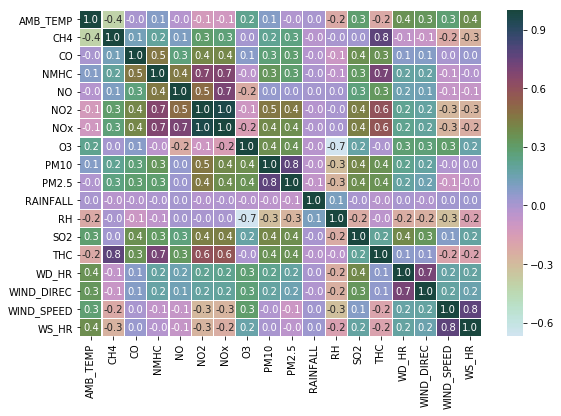

In [14]:
f, ax = plt.subplots(figsize=(9, 6))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(corr, fmt=".1f", linewidth=0.1, cmap=cmap, annot=True)


和pm2.5的person相关的有pm10,no2等